In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [48]:
start='2012-01-01'
end='2022-12-21'
stock='GOOG'
data=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [54]:
data.reset_index(inplace=True)

In [56]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.968765,96.871931,93.603675,95.197945,26452900
2757,2022-12-15,90.873482,93.693352,90.106242,93.205108,28298800
2758,2022-12-16,90.534691,91.421504,89.687736,90.873470,48485500


In [60]:
ma_100_days=data.Close.rolling(100).mean()

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

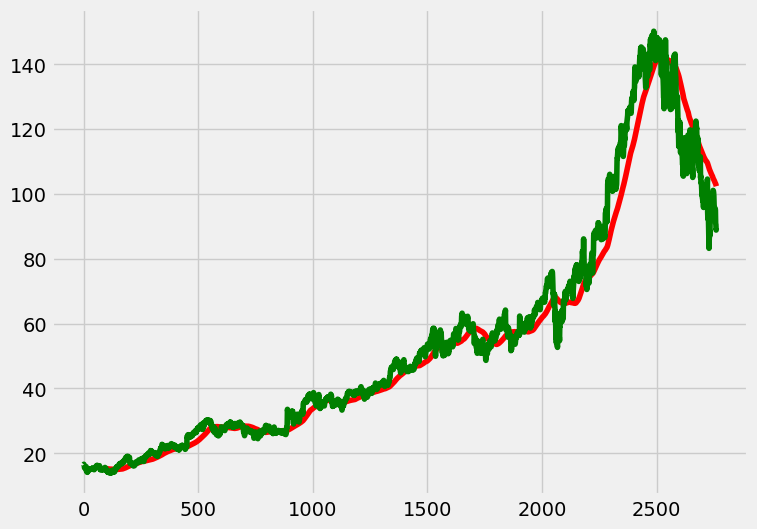

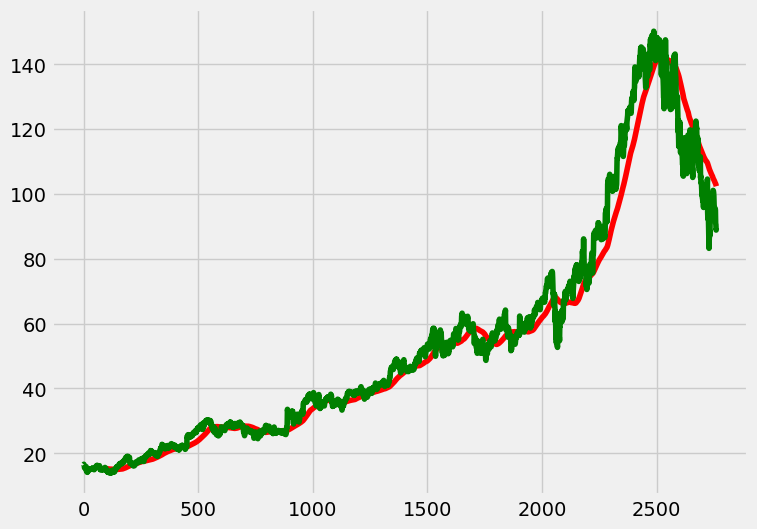

In [64]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [66]:
ma_200_days=data.Close.rolling(200).mean()

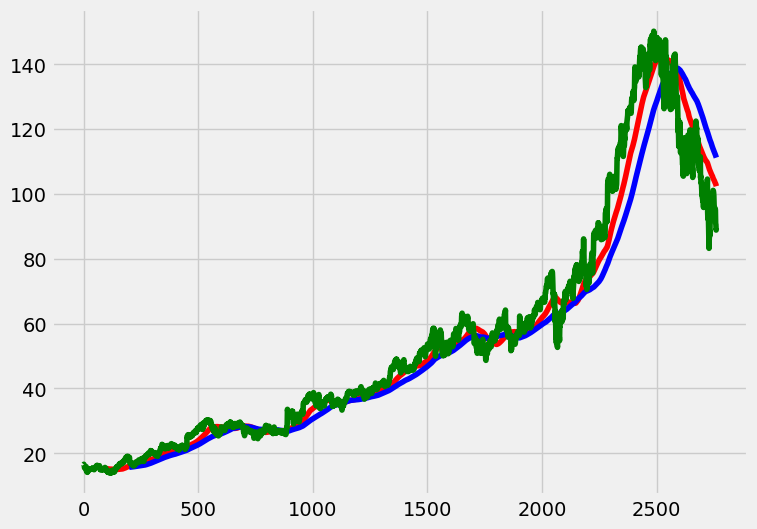

In [68]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [70]:
data.dropna(inplace=True)

In [80]:
#done with the data cleaning 
data_train=pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [82]:
data_train.shape[0]

2208

In [84]:
data_test.shape[0]

553

In [86]:
#splitting of dataset is complete
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [88]:
data_train_scale=scaler.fit_transform(data_train)

In [90]:
x=[]
y=[]
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [96]:
x,y=np.array(x),np.array(y)

In [98]:
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input

model = Sequential([
    Input(shape=(x.shape[1], 1)),  # Define input shape properly
    LSTM(units=50, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(units=60, activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(units=80, activation='relu', return_sequences=True),
    Dropout(0.4),
    LSTM(units=120, activation='relu'),
    Dropout(0.5),
    Dense(units=1)
])


In [108]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [110]:
model.fit(x,y,epochs = 50,batch_size=32, verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 29s 237ms/step - loss: 0.0806
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 250ms/step - loss: 0.0072
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 245ms/step - loss: 0.0050
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 256ms/step - loss: 0.0058
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 247ms/step - loss: 0.0049
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 249ms/step - loss: 0.0044
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step - loss: 0.0051
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - loss: 0.0037
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 245ms/step - loss: 0.0040
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 246ms/step - loss: 0.0039
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 254ms/step - loss: 0.0037
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step - loss: 0.0041
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 245ms/step - loss: 0.0034
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 252ms/step - loss: 0.0031
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 

In [112]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [114]:
pas_100_days=data_train.tail(100)

In [116]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [120]:
data_test_scale =scaler.fit_transform(data_test)

In [126]:
x=[]
y=[]
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [128]:
y_predict=model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step


In [138]:
scale=1/scaler.scale_

In [140]:
y_predict=y_predict*scale

In [142]:
y=y*scale

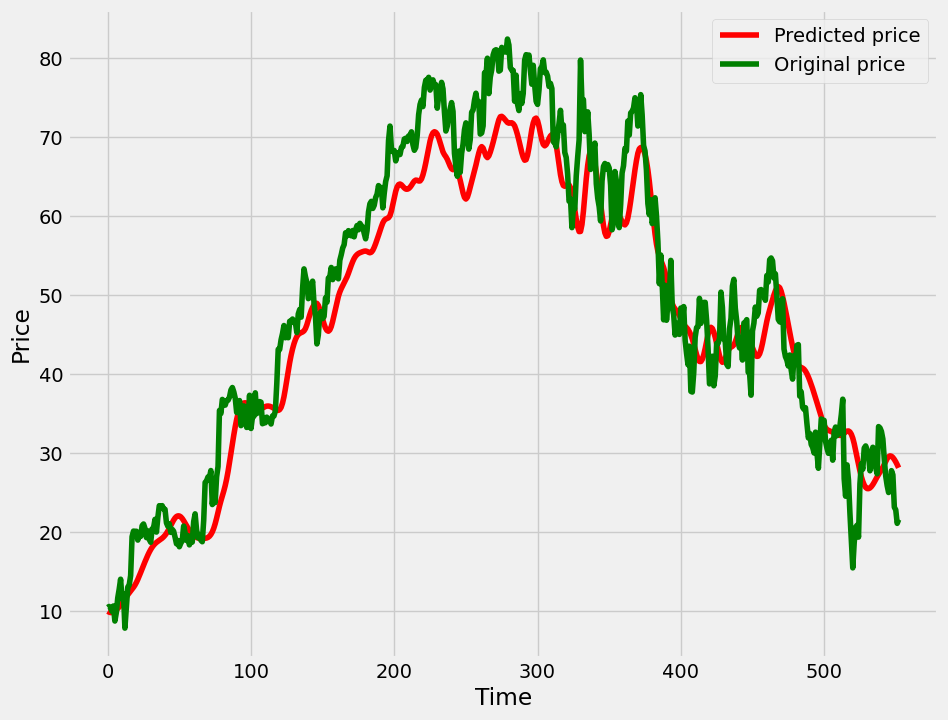

In [158]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted price')
plt.plot(y,'g',label='Original price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [160]:
model.save('Stock Predictions Model.keras')